In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 데이터 불러오기

In [146]:
ko = '지역별_전월세전환율_20220427192243.csv'
ko_df = pd.read_csv(ko, encoding='CP949')
ko_df = ko_df[1:]
ko_df

,시점,서울
1,2015.02,6.7
2,2015.03,6.7
3,2015.04,6.6
4,2015.05,6.6
5,2015.06,6.5
...,...,...
81,2021.10,4.7
82,2021.11,4.7
83,2021.12,4.7
84,2022.01,4.7


In [147]:
cofix_22 = 'COFIX통계(2022년도)_20220427.xlsx'
cofix_21 = 'COFIX통계(2021년도)_20220420.xlsx'
cofix_20 = 'COFIX통계(2020년도)_20220421.xlsx'
cofix_19 = 'COFIX통계(2019년도)_20220421.xlsx'
cofix_18 = 'COFIX통계(2018년도)_20220426.xlsx'
cofix_17 = 'COFIX통계(2017년도)_20220426.xlsx'
cofix_16 = 'COFIX통계(2016년도)_20220426.xlsx'


home_21 = '오피스텔(전월세)_실거래가_2021_서울.csv'
home_20 = '오피스텔(전월세)_실거래가_2020_서울.csv'
home_19 = '오피스텔(전월세)_실거래가_2019_서울.csv'
home_18 = '오피스텔(전월세)_실거래가_2018_서울.csv'
home_17 = '오피스텔(전월세)_실거래가_2017_서울.csv'
home_16 = '오피스텔(전월세)_실거래가_2016_서울.csv'

In [148]:
df_co0 = pd.read_excel(cofix_22,header=1).reset_index(drop=True)
df_co1 = pd.read_excel(cofix_21,header=1).reset_index(drop=True)
df_co2 = pd.read_excel(cofix_20,header=1).reset_index(drop=True)
df_co3 = pd.read_excel(cofix_19,header=1).reset_index(drop=True)
df_co4 = pd.read_excel(cofix_18,header=1).reset_index(drop=True)
df_co5 = pd.read_excel(cofix_17,header=1).reset_index(drop=True)
df_co6 = pd.read_excel(cofix_16,header=1).reset_index(drop=True)


df_co = pd.concat([df_co0,df_co1],axis=0)
df_co = pd.concat([df_co,df_co2],axis=0)
df_co = pd.concat([df_co,df_co3],axis=0)
df_co = pd.concat([df_co,df_co4],axis=0)
df_co = pd.concat([df_co,df_co5],axis=0)
df_co = pd.concat([df_co,df_co6],axis=0)


df_co = df_co[['대상월','신규취급액기준 COFIX']]
df_co

,대상월,신규취급액기준 COFIX
0,2022/03,1.72
1,2022/02,1.70
2,2022/01,1.64
3,2021/12,1.69
0,2021/11,1.55
...,...,...
7,2016/04,1.55
8,2016/03,1.55
9,2016/02,1.57
10,2016/01,1.65


In [149]:
df_test = pd.read_csv(home_21, encoding='CP949', thousands = ',')
df_home = pd.read_csv(home_20, encoding='CP949', thousands = ',')
df_home2 = pd.read_csv(home_19, encoding='CP949', thousands = ',')
df_home3 = pd.read_csv(home_18, encoding='CP949', thousands = ',')
df_home4 = pd.read_csv(home_17, encoding='CP949', thousands = ',')
df_home5 = pd.read_csv(home_16, encoding='CP949', thousands = ',')

df_home = pd.concat([df_test,df_home],axis=0)
df_home = pd.concat([df_home,df_home2],axis=0)
df_home = pd.concat([df_home,df_home3],axis = 0)
df_home = pd.concat([df_home,df_home4],axis = 0)
df_home = pd.concat([df_home,df_home5],axis = 0)


print(df_home.shape)
df_home.head()

(258252, 19)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,157-9,157,9,\t(157-9)\t,전세,29.25,202102,2,15000,0,2,2011.0,선릉로4길 19,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,157-9,157,9,\t(157-9)\t,전세,36.96,202106,29,24000,0,3,2011.0,선릉로4길 19,202108~202308,신규,-,NaN,NaN
2,서울특별시 강남구 개포동,157-9,157,9,\t(157-9)\t,전세,29.25,202112,4,20000,0,3,2011.0,선릉로4길 19,202112~202312,신규,-,0.0,0.0
3,서울특별시 강남구 개포동,1237-3,1237,3,(1237-3),월세,33.13,202102,10,3000,100,3,2020.0,논현로20길 12,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,1237-3,1237,3,(1237-3),월세,34.12,202103,5,3000,105,5,2020.0,논현로20길 12,-,-,-,NaN,NaN


### 합치기전 대상 컬럼 선정

In [150]:
ko_df['대상월'] = ko_df['시점'].str[:4] + '/' + ko_df['시점'].str[5:]
ko_df['전월세전환율'] = ko_df['서울']
ko_df = ko_df[['대상월','전월세전환율']]
ko_df, ko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 1 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대상월     85 non-null     object
 1   전월세전환율  85 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


(        대상월 전월세전환율
 1   2015/02    6.7
 2   2015/03    6.7
 3   2015/04    6.6
 4   2015/05    6.6
 5   2015/06    6.5
 ..      ...    ...
 81  2021/10    4.7
 82  2021/11    4.7
 83  2021/12    4.7
 84  2022/01    4.7
 85  2022/02    4.7
 
 [85 rows x 2 columns],
 None)

In [151]:
# 데이터 전처리

# 계약년월일 문자 타입 변경
df_home['계약년월'] = df_home['계약년월'].astype(str)
df_home['계약일'] = df_home['계약일'].astype(str)

# 분리된 계약년월일을 계약일자로 합치고 datetime으로 변환 
df_home['계약일자'] = pd.to_datetime(df_home['계약년월'].str[:4] 
                                 + '/' + df_home['계약년월'].str[4:] 
                                 + '/' + df_home['계약일'])

# cofix데이터와 합치기 좋게 대상월 컬럼 신설
df_home['대상월'] = df_home['계약년월'].str[:4] + '/' + df_home['계약년월'].str[4:]

# 시군구 구만 따로 저장
df_home['구'] = df_home['시군구'].str[6:9]
df_home['동'] = df_home['시군구'].str[10:]

# 컬럼 정리
df_home = df_home[['계약일자','구','동', '전월세구분', '전용면적(㎡)',
                   '보증금(만원)', '월세(만원)', '층', 
                   '건축년도','대상월']]
df_home['동'] = df_home['동'].str.strip()

df_home.shape

(258252, 10)

In [152]:
df_home = df_home.sort_values(by='계약일자').reset_index(drop=True)
df_home

,계약일자,구,동,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,대상월
0,2016-01-01,동작구,노량진동,월세,19.28,1000,65,16,2015.0,2016/01
1,2016-01-01,동대문,회기동,월세,22.95,3000,35,6,2006.0,2016/01
2,2016-01-01,강남구,대치동,전세,13.96,10000,0,2,2004.0,2016/01
3,2016-01-01,영등포,당산동5가,월세,26.22,1000,70,3,2015.0,2016/01
4,2016-01-01,강남구,역삼동,전세,23.87,18000,0,12,2013.0,2016/01
...,...,...,...,...,...,...,...,...,...,...
258247,2021-12-31,영등포,양평동4가,전세,85.65,49000,0,7,2007.0,2021/12
258248,2021-12-31,서대문,연희동,월세,15.94,500,50,11,2003.0,2021/12
258249,2021-12-31,광진구,화양동,월세,18.83,1000,70,7,2016.0,2021/12
258250,2021-12-31,영등포,영등포동2가,전세,19.55,24900,0,8,2021.0,2021/12


In [153]:
# 건축년도 미기재는 주로 신축 오피스텔로 미표기 된것임. 대부분 계약연도 = 입주시기이므로 계약연도로 변환
df_home['건축년도']=df_home['건축년도'].fillna(df_home['계약일자'].dt.year)
df_home['건축년도'] = df_home['건축년도'].round(0).astype(int)

# 코픽스 자료와 데이터 합치기 기준은 대상월
df = pd.merge(df_home, df_co, on='대상월')
# 전월세 전환율 합치기
df = pd.merge(df, ko_df, on='대상월')
df['전월세전환율'] = df['전월세전환율'].astype(float)

print(df.shape)
df.head()

(258252, 12)


,계약일자,구,동,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,대상월,신규취급액기준 COFIX,전월세전환율
0,2016-01-01,동작구,노량진동,월세,19.28,1000,65,16,2015,2016/01,1.65,6.0
1,2016-01-01,동대문,회기동,월세,22.95,3000,35,6,2006,2016/01,1.65,6.0
2,2016-01-01,강남구,대치동,전세,13.96,10000,0,2,2004,2016/01,1.65,6.0
3,2016-01-01,영등포,당산동5가,월세,26.22,1000,70,3,2015,2016/01,1.65,6.0
4,2016-01-01,강남구,역삼동,전세,23.87,18000,0,12,2013,2016/01,1.65,6.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258252 entries, 0 to 258251
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   계약일자           258252 non-null  datetime64[ns]
 1   구              258252 non-null  object        
 2   동              258252 non-null  object        
 3   전월세구분          258252 non-null  object        
 4   전용면적(㎡)        258252 non-null  float64       
 5   보증금(만원)        258252 non-null  int64         
 6   월세(만원)         258252 non-null  int64         
 7   층              258252 non-null  int64         
 8   건축년도           258252 non-null  int32         
 9   대상월            258252 non-null  object        
 10  신규취급액기준 COFIX  258252 non-null  float64       
 11  전월세전환율         258252 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(4)
memory usage: 24.6+ MB


In [155]:
df["보증금(만원)"].describe()

count    258252.000000
mean      10921.547063
std       11594.788137
min           0.000000
25%        1000.000000
50%        8550.000000
75%       17000.000000
max      590625.000000
Name: 보증금(만원), dtype: float64

In [156]:
df["월세(만원)"].describe()

count    258252.000000
mean         28.929433
std          34.389462
min           0.000000
25%           0.000000
50%          20.000000
75%          53.000000
max        2123.000000
Name: 월세(만원), dtype: float64

In [157]:
## 전월세의 범주 비율

df['전월세구분'].value_counts(normalize=True)

월세    0.525154
전세    0.474846
Name: 전월세구분, dtype: float64

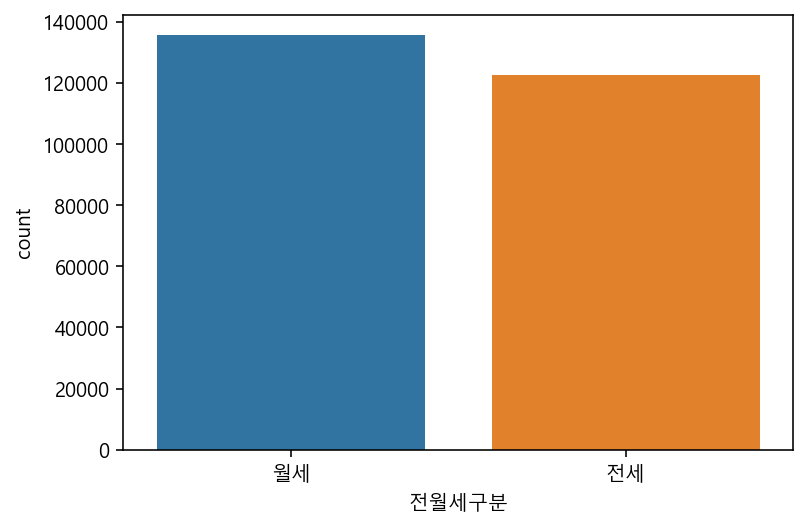

In [158]:
sns.countplot(x=df['전월세구분']);

In [159]:
len(df['동'].unique())

272

In [160]:
len(df['구'].unique())

25

In [161]:
df['구'].unique()

array(['동작구', '동대문', '강남구', '영등포', '구로구', '강서구', '서초구', '관악구', '강북구',
       '은평구', '마포구', '중랑구', '강동구', '금천구', '성북구', '서대문', '광진구', '송파구',
       '노원구', '용산구', '중구 ', '도봉구', '양천구', '성동구', '종로구'], dtype=object)

In [162]:
# 연별 거래량 체크

df['계약일자'].dt.year.value_counts()

2020    54225
2021    53068
2019    48547
2018    40096
2017    34708
2016    27608
Name: 계약일자, dtype: int64

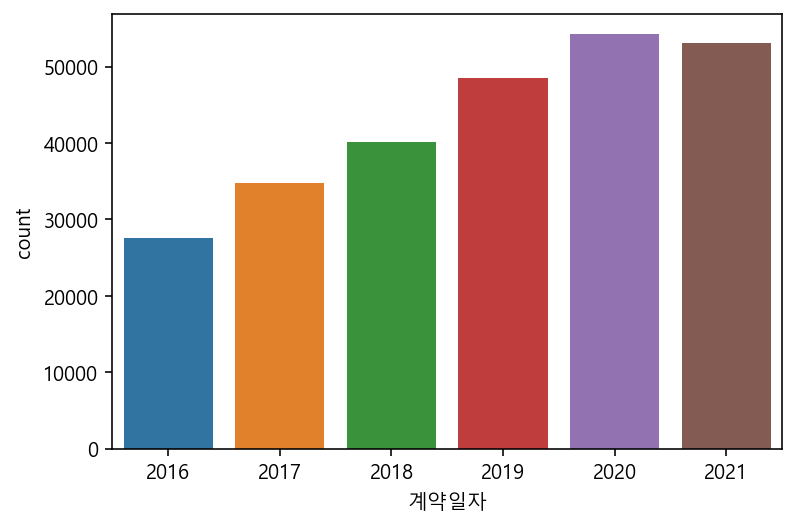

In [163]:
sns.countplot(x=df['계약일자'].dt.year);

In [164]:
# 월간 거래량 체크

df['계약일자'].dt.month.value_counts()

1     26281
2     24950
12    23513
7     22408
8     21890
3     21750
6     20891
10    19827
5     19716
11    19716
4     19295
9     18015
Name: 계약일자, dtype: int64

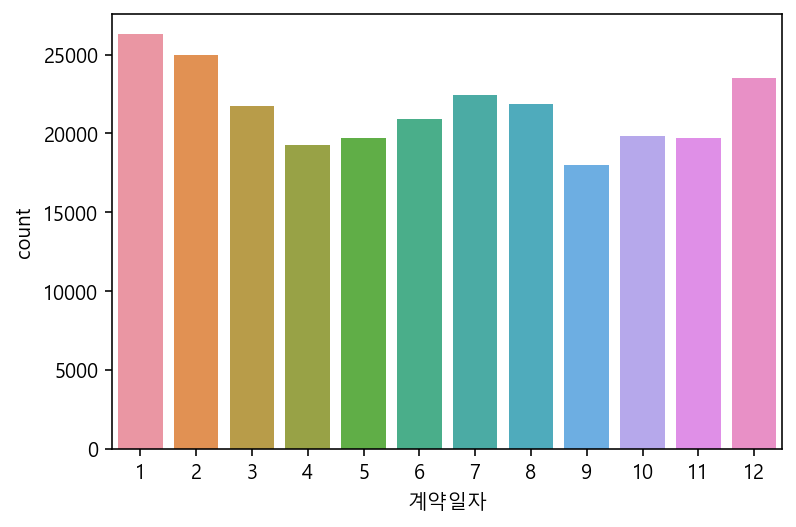

In [165]:
sns.countplot(x=df['계약일자'].dt.month);

In [166]:
df['구'].value_counts()

강서구    47198
영등포    27231
송파구    21021
마포구    20050
강남구    15971
구로구    15569
관악구    13138
은평구    11741
동대문     9935
금천구     9470
강동구     9444
서초구     8837
성동구     6570
광진구     5482
양천구     5329
중구      5246
용산구     4590
서대문     3979
도봉구     3690
종로구     3479
중랑구     3118
동작구     2371
노원구     1987
성북구     1909
강북구      897
Name: 구, dtype: int64

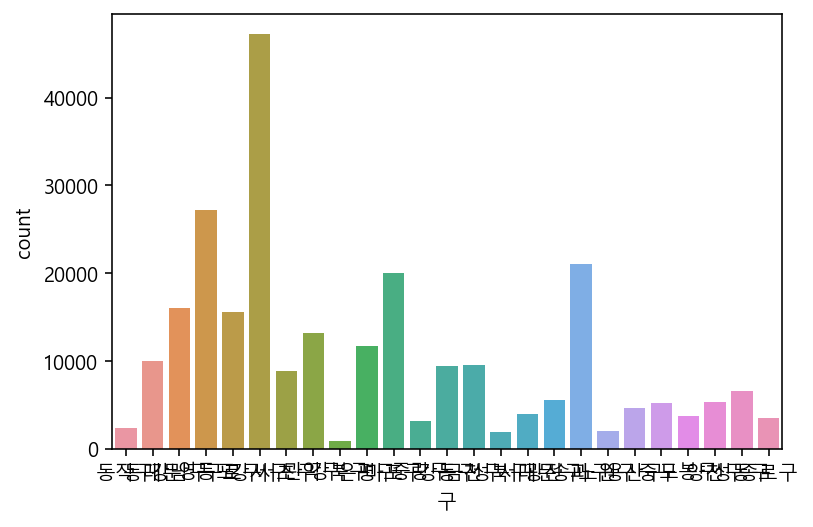

In [167]:
sns.countplot(x=df['구']);

# 추가 전처리

In [168]:
df['계약연도'] = df['계약일자'].dt.year
df['계약월'] = df['계약일자'].dt.month
df['계약일'] = df['계약일자'].dt.day
df['보증금'] = ((df['월세(만원)']*12)/df['전월세전환율']*100+df['보증금(만원)']).round(0).astype(int)

# 사용할 컬럼만 남김
df = df[['계약일자',
    '계약연도','계약월','계약일','구','동',
    '전용면적(㎡)','층','전월세구분',
    '건축년도','신규취급액기준 COFIX','보증금'
    ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258252 entries, 0 to 258251
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   계약일자           258252 non-null  datetime64[ns]
 1   계약연도           258252 non-null  int64         
 2   계약월            258252 non-null  int64         
 3   계약일            258252 non-null  int64         
 4   구              258252 non-null  object        
 5   동              258252 non-null  object        
 6   전용면적(㎡)        258252 non-null  float64       
 7   층              258252 non-null  int64         
 8   전월세구분          258252 non-null  object        
 9   건축년도           258252 non-null  int32         
 10  신규취급액기준 COFIX  258252 non-null  float64       
 11  보증금            258252 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 31.7+ MB


In [169]:
df

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
0,2016-01-01,2016,1,1,동작구,노량진동,19.28,16,월세,2015,1.65,14000
1,2016-01-01,2016,1,1,동대문,회기동,22.95,6,월세,2006,1.65,10000
2,2016-01-01,2016,1,1,강남구,대치동,13.96,2,전세,2004,1.65,10000
3,2016-01-01,2016,1,1,영등포,당산동5가,26.22,3,월세,2015,1.65,15000
4,2016-01-01,2016,1,1,강남구,역삼동,23.87,12,전세,2013,1.65,18000
...,...,...,...,...,...,...,...,...,...,...,...,...
258247,2021-12-31,2021,12,31,영등포,양평동4가,85.65,7,전세,2007,1.69,49000
258248,2021-12-31,2021,12,31,서대문,연희동,15.94,11,월세,2003,1.69,13266
258249,2021-12-31,2021,12,31,광진구,화양동,18.83,7,월세,2016,1.69,18872
258250,2021-12-31,2021,12,31,영등포,영등포동2가,19.55,8,전세,2021,1.69,24900


In [227]:
df.to_csv("CP1.csv")

In [230]:
csv = "CP1.csv"

df = pd.read_csv(csv)
df['계약일자'] = pd.to_datetime(df['계약일자'])
del df["Unnamed: 0"]
print(df.shape)
df

(258252, 12)


,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
0,2016-01-01,2016,1,1,동작구,노량진동,19.28,16,월세,2015,1.65,14000
1,2016-01-01,2016,1,1,동대문,회기동,22.95,6,월세,2006,1.65,10000
2,2016-01-01,2016,1,1,강남구,대치동,13.96,2,전세,2004,1.65,10000
3,2016-01-01,2016,1,1,영등포,당산동5가,26.22,3,월세,2015,1.65,15000
4,2016-01-01,2016,1,1,강남구,역삼동,23.87,12,전세,2013,1.65,18000
...,...,...,...,...,...,...,...,...,...,...,...,...
258247,2021-12-31,2021,12,31,영등포,양평동4가,85.65,7,전세,2007,1.69,49000
258248,2021-12-31,2021,12,31,서대문,연희동,15.94,11,월세,2003,1.69,13266
258249,2021-12-31,2021,12,31,광진구,화양동,18.83,7,월세,2016,1.69,18872
258250,2021-12-31,2021,12,31,영등포,영등포동2가,19.55,8,전세,2021,1.69,24900


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258252 entries, 0 to 258251
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   계약일자           258252 non-null  datetime64[ns]
 1   계약연도           258252 non-null  int64         
 2   계약월            258252 non-null  int64         
 3   계약일            258252 non-null  int64         
 4   구              258252 non-null  object        
 5   동              258252 non-null  object        
 6   전용면적(㎡)        258252 non-null  float64       
 7   층              258252 non-null  int64         
 8   전월세구분          258252 non-null  object        
 9   건축년도           258252 non-null  int64         
 10  신규취급액기준 COFIX  258252 non-null  float64       
 11  보증금            258252 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 23.6+ MB


In [232]:
#2021년 이전와 이후로 분할

train_df = df.loc[df.계약일자 < '2021-01-01',:]
test_df = df.loc[df.계약일자 >= '2021-01-01',:]

In [233]:
train = train_df.copy()
test = test_df.copy()

## train/test shape
print(train.shape)
print(test.shape)

(205184, 12)
(53068, 12)


In [172]:
train['보증금'].describe()

count    205184.000000
mean      17118.447535
std        9597.717558
min         100.000000
25%       12000.000000
50%       15000.000000
75%       19950.000000
max      576600.000000
Name: 보증금, dtype: float64

보증금 -> Skewness: 9.274575, Kurtosis: 313.969114


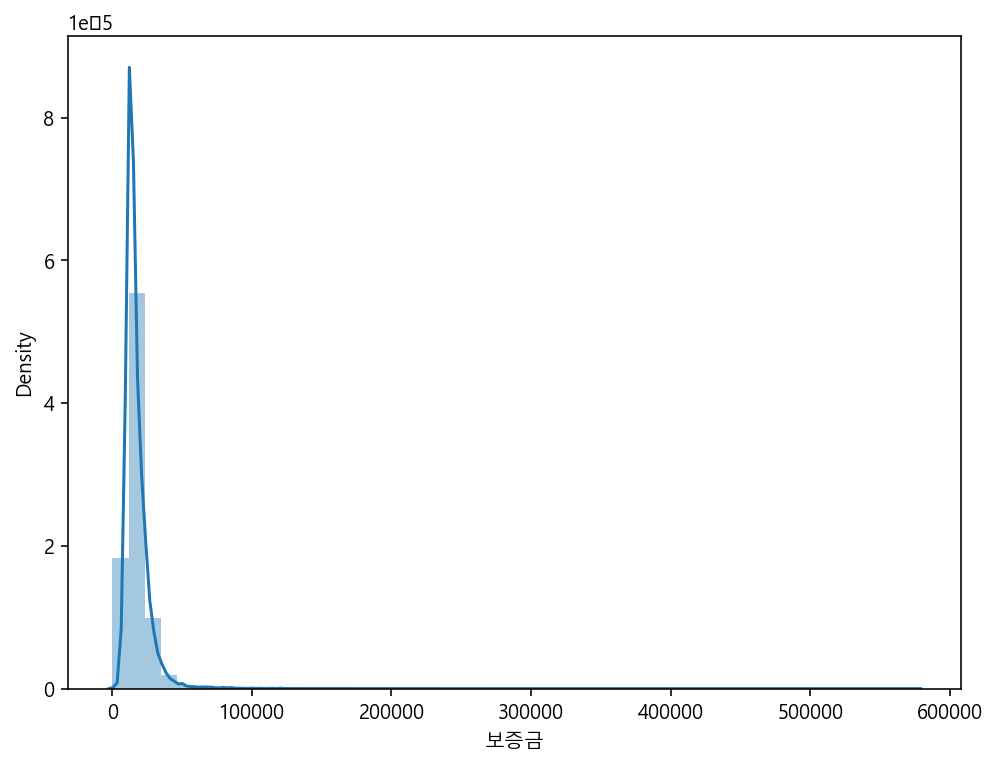

In [173]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['보증금'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('보증금',train['보증금'].skew(), 
                                                     train['보증금'].kurt()))

왜도(Skewness) : 왼쪽으로 치우쳐져 있을수록 값이크고, 오른쪽으로 치우쳐져 있을 수록 값이 작아진다. 즉, 0에 가까울수록 좋은 형태\
첨도(Kurtosis) : 첨도 값이 3에 가까울 경우 정규분포에 가까우며, 첨도 값이 클수록 뾰족하고 값이 작을 수록 완만해진다

In [174]:
# 로그 변환
train['보증금'] = np.log1p(train['보증금'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('보증금',train['보증금'].skew(), 
                                                     train['보증금'].kurt()))

보증금 -> Skewness: 0.506298, Kurtosis: 2.818036


<AxesSubplot:xlabel='보증금', ylabel='Density'>

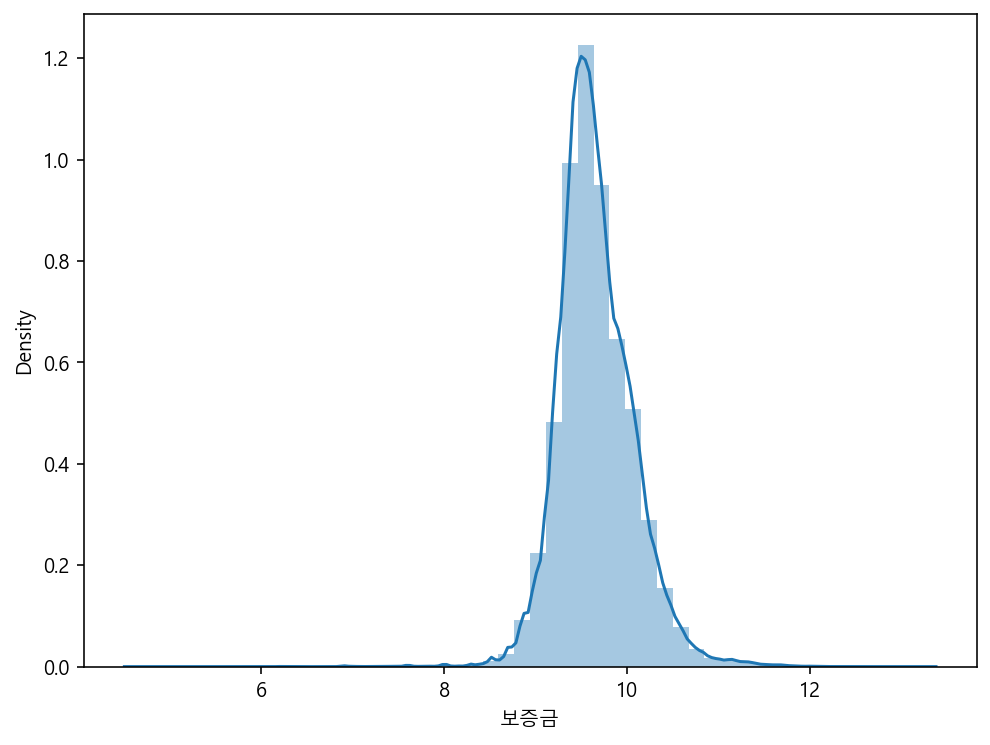

In [175]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['보증금'])

### columns 상관관계 확인

<AxesSubplot:>

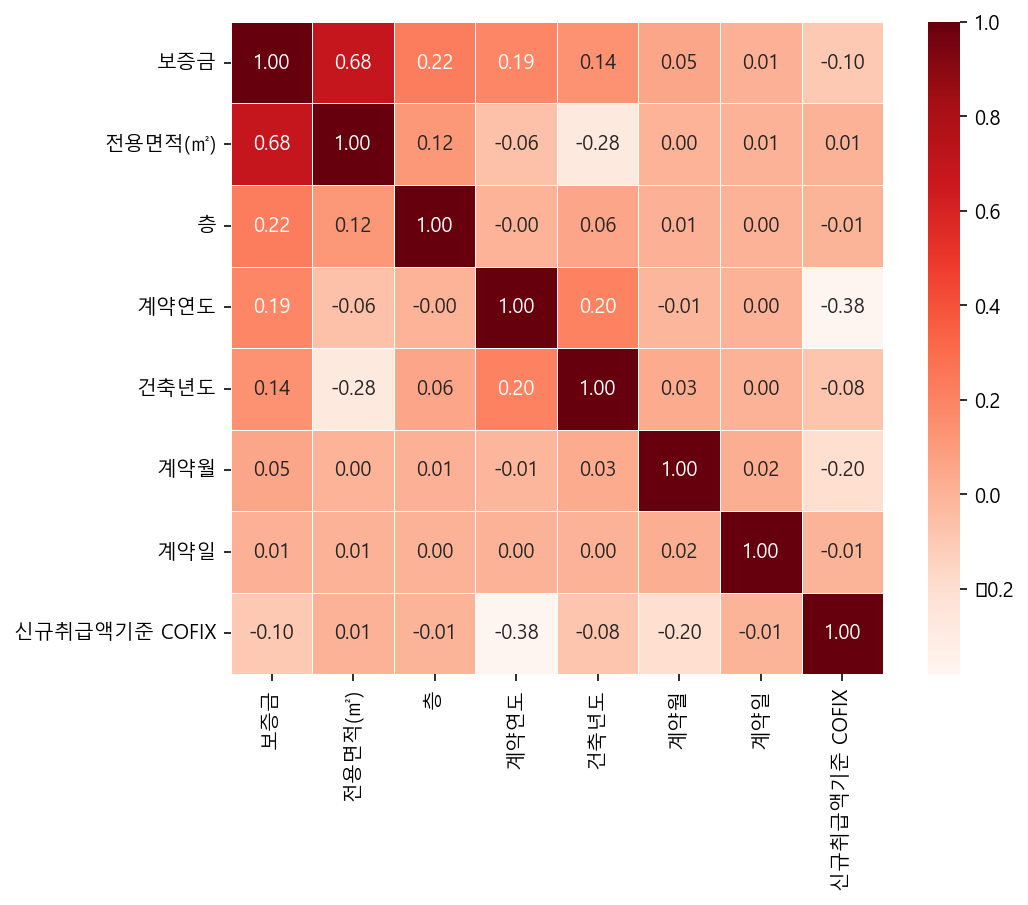

In [176]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, '보증금')['보증금'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

Numeric Variable

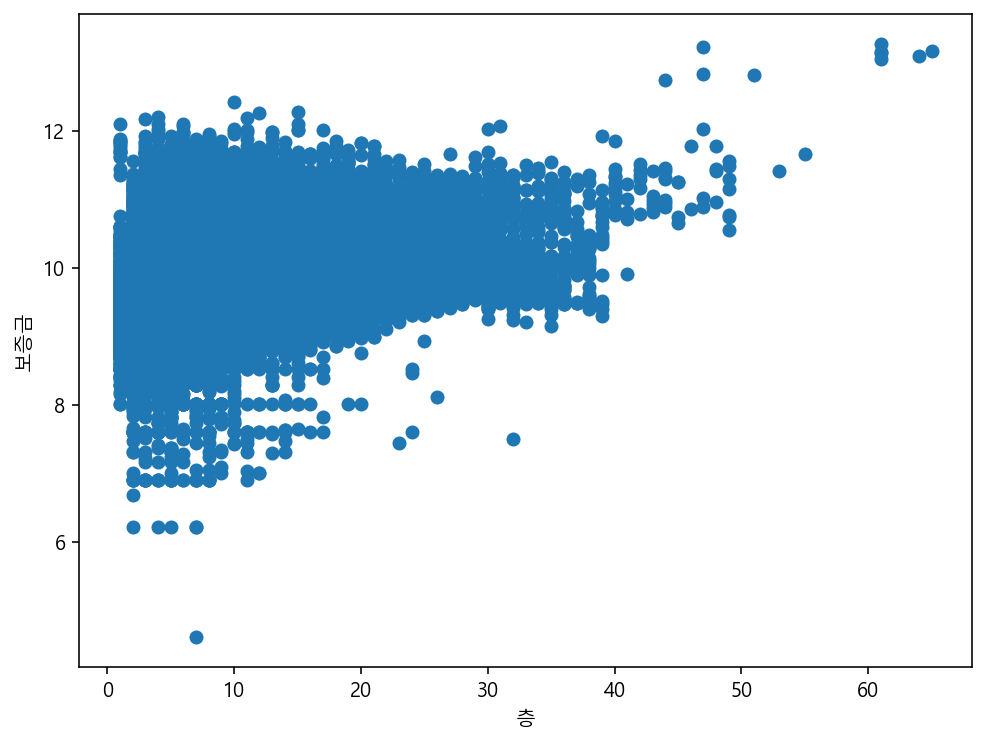

In [177]:
# floor : 층.

f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['층'], train['보증금'])
plt.xlabel('층')
plt.ylabel('보증금')
plt.show()

층 -> Skewness: 1.476099, Kurtosis: 4.436023


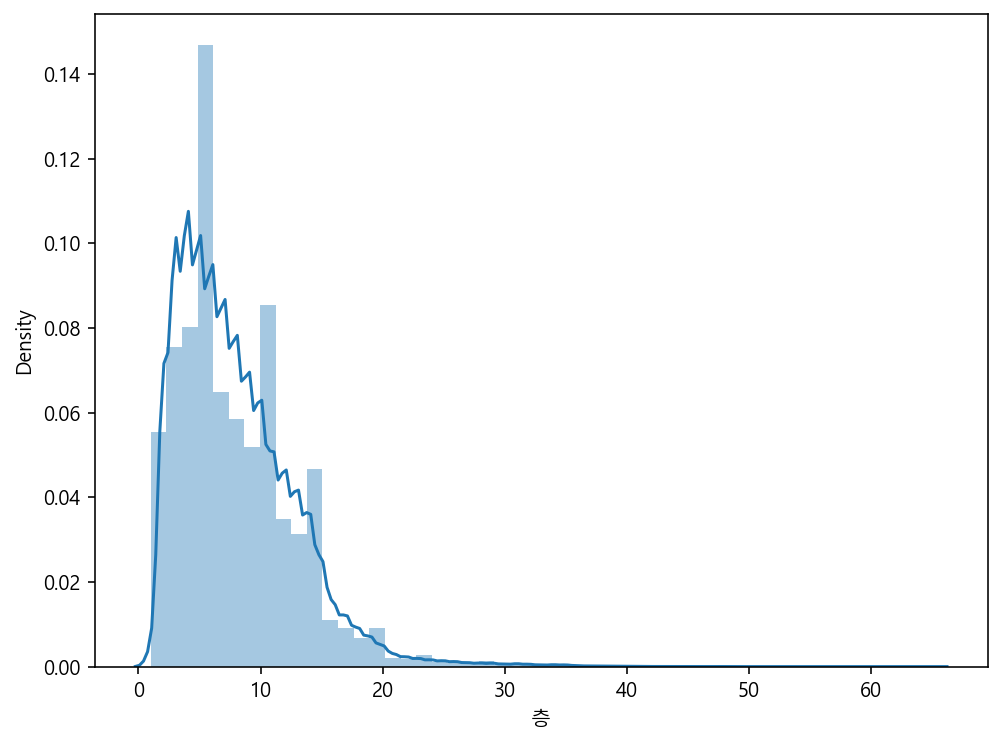

In [178]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['층'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('층',train['층'].skew(), 
                                                     train['층'].kurt()))

In [179]:
# 전용면적

train['전용면적(㎡)'].describe()

count    205184.000000
mean         29.132832
std          16.395824
min           3.400000
25%          19.630000
50%          24.240000
75%          30.370000
max         445.120000
Name: 전용면적(㎡), dtype: float64

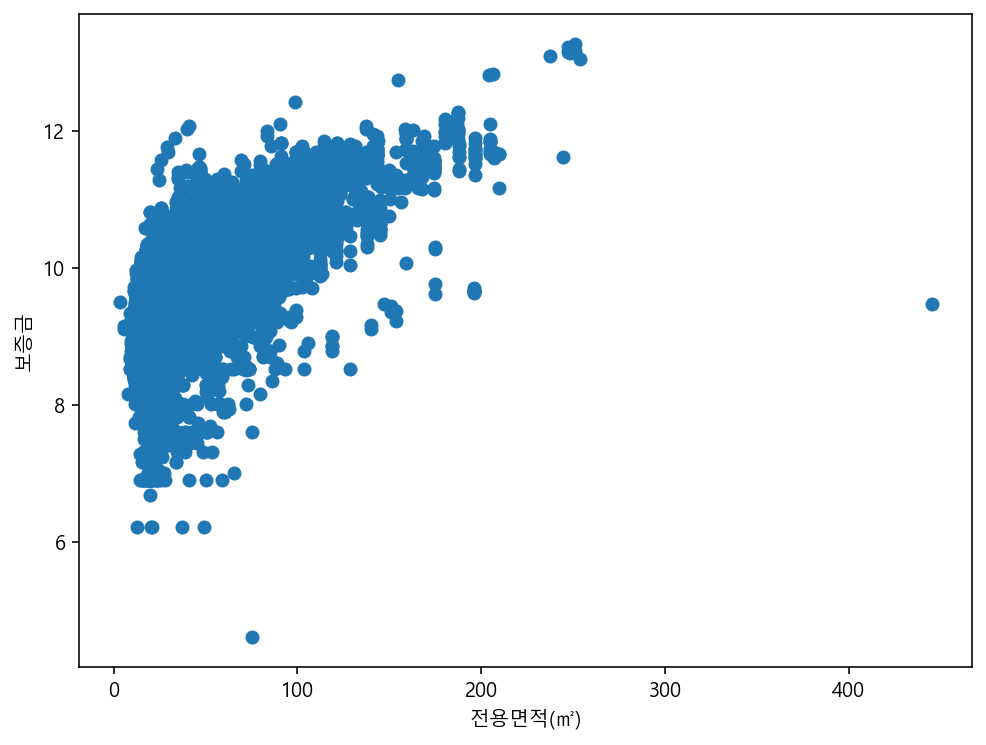

In [180]:
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['전용면적(㎡)'], train['보증금'])
plt.xlabel('전용면적(㎡)')
plt.ylabel('보증금')
plt.show()

In [181]:
train[train['전용면적(㎡)']>400]

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
64941,2018-01-21,2018,1,21,관악구,봉천동,445.12,2,월세,2000,1.78,9.472782


In [182]:
train[(train['전용면적(㎡)']<150)&(train['보증금']<6)]

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
112394,2019-03-04,2019,3,4,관악구,봉천동,75.08,7,전세,2003,1.94,4.615121


전용면적(㎡) -> Skewness: 3.115353, Kurtosis: 15.827509


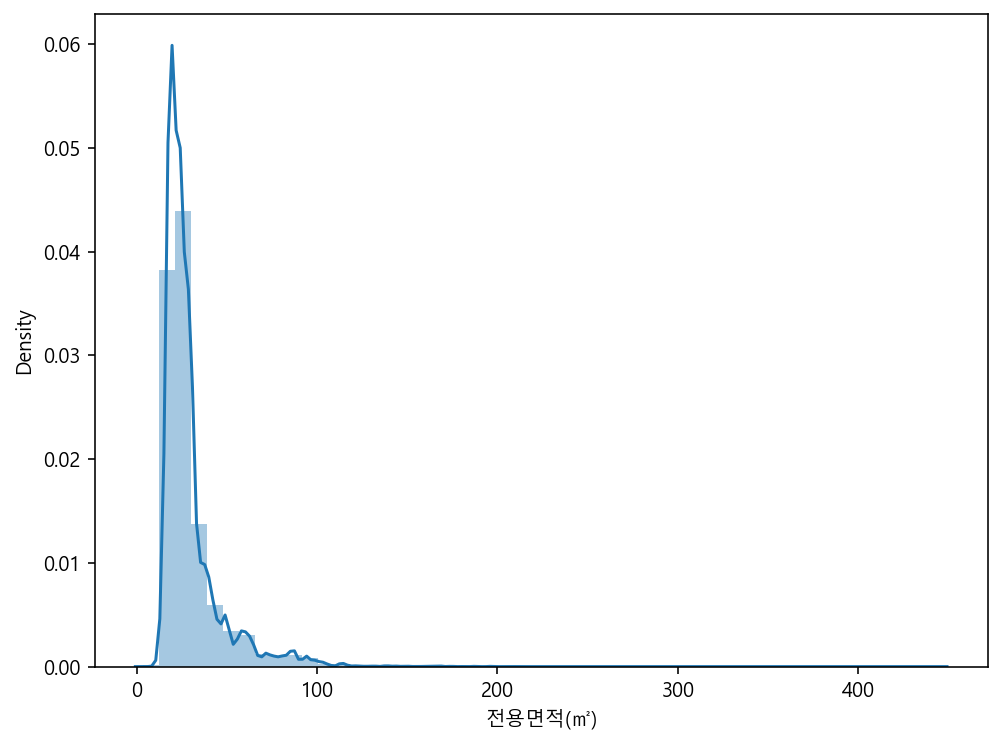

In [183]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['전용면적(㎡)'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('전용면적(㎡)',train['전용면적(㎡)'].skew(), 
                                                     train['전용면적(㎡)'].kurt()))

transaction_year_month : 거래 년, 월

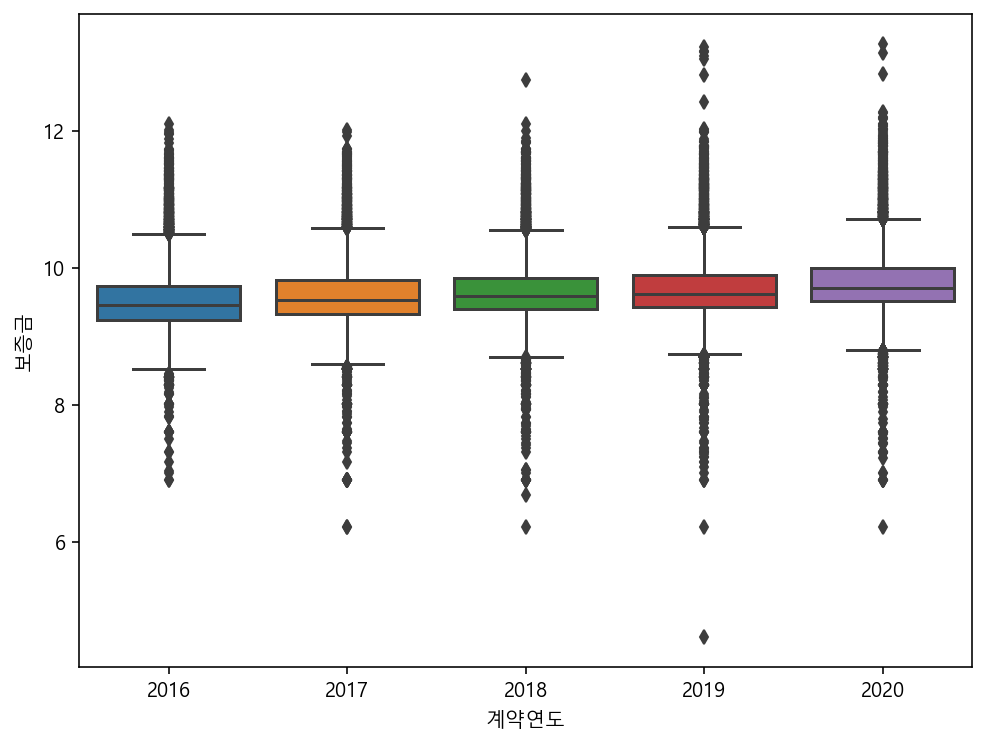

In [184]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['계약연도'], train['보증금'])
plt.show()

In [185]:
train[(train['계약연도']==2019) & (train['보증금']<6)]

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
112394,2019-03-04,2019,3,4,관악구,봉천동,75.08,7,전세,2003,1.94,4.615121


In [186]:
train[(train['구']=='관악구')]

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
14,2016-01-02,2016,1,2,관악구,봉천동,18.81,2,월세,2004,1.65,9.105091
20,2016-01-02,2016,1,2,관악구,봉천동,18.54,6,전세,2003,1.65,8.853808
41,2016-01-02,2016,1,2,관악구,봉천동,17.82,4,월세,2002,1.65,9.210440
53,2016-01-02,2016,1,2,관악구,봉천동,26.51,6,월세,2011,1.65,9.546884
54,2016-01-02,2016,1,2,관악구,봉천동,14.88,4,전세,2003,1.65,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
205040,2020-12-30,2020,12,30,관악구,봉천동,28.50,5,월세,2003,0.90,9.690975
205097,2020-12-31,2020,12,31,관악구,봉천동,15.76,9,월세,2019,0.90,9.759617
205115,2020-12-31,2020,12,31,관악구,봉천동,17.19,11,월세,2005,0.90,9.274348
205120,2020-12-31,2020,12,31,관악구,봉천동,24.92,13,월세,2016,0.90,9.919361


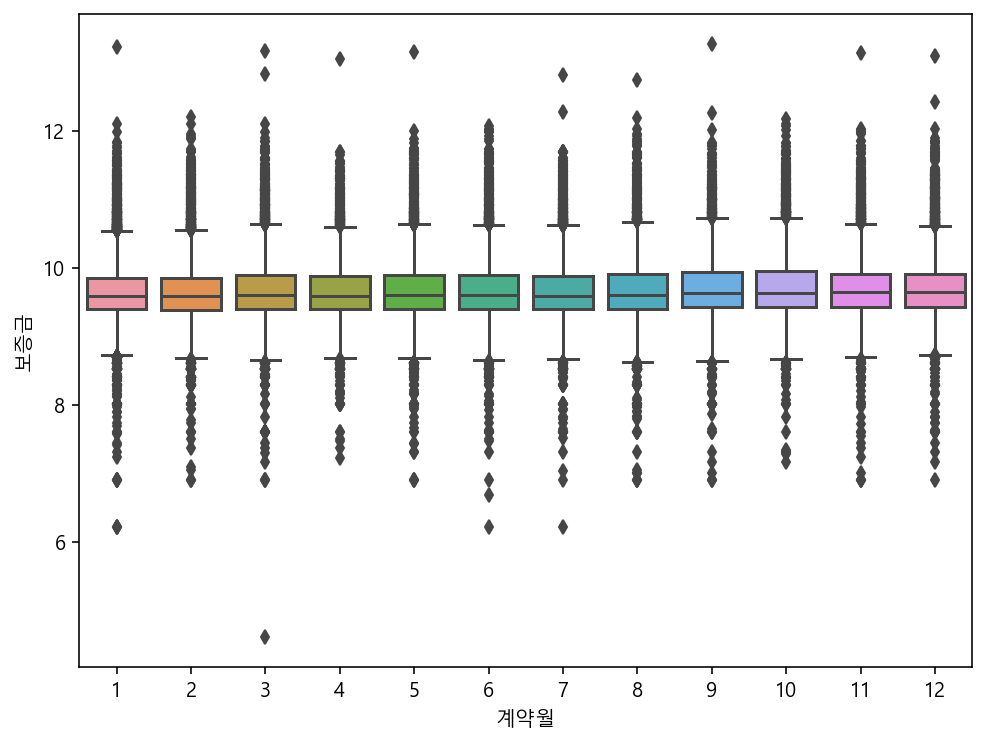

In [187]:
# 계약월 데이터
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['계약월'], train['보증금'])
plt.show()

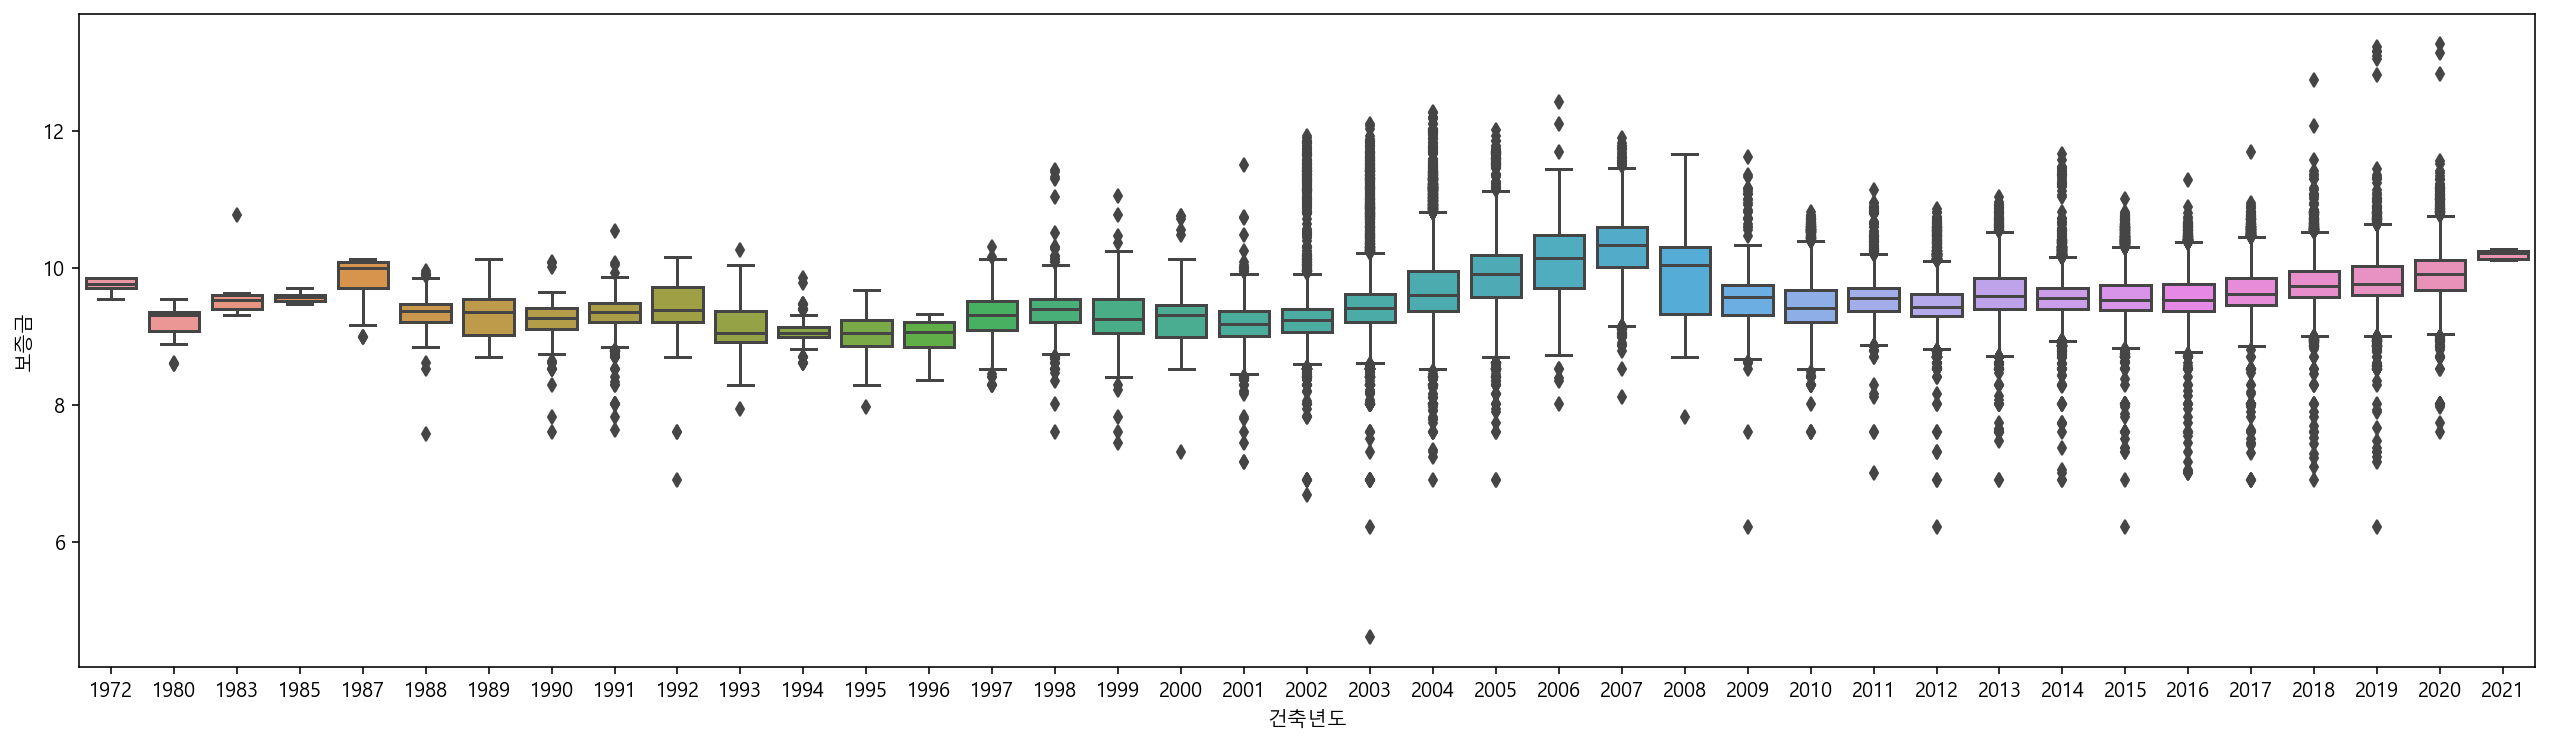

In [188]:
# 건축년도

f, ax = plt.subplots(figsize = (22,6))
sns.boxplot(train['건축년도'], train['보증금'])
plt.show()

In [189]:
replace_name = {'전세' : 0, '월세' : 1 }
train = train.replace({'전월세구분' : replace_name})
test = test.replace({'전월세구분' : replace_name})

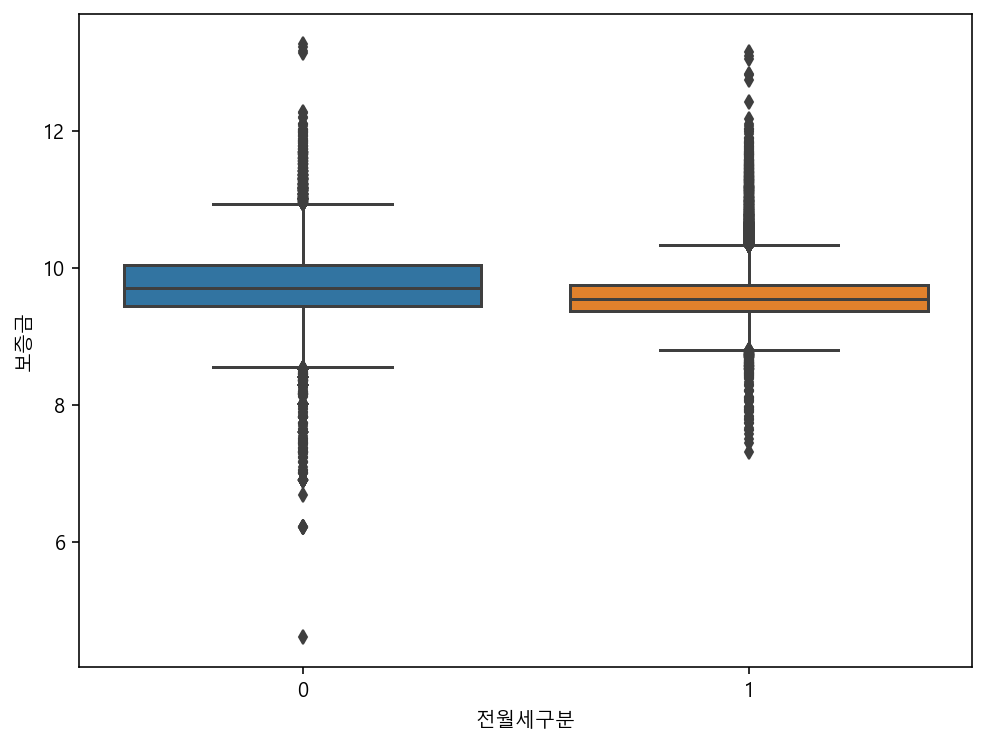

In [190]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['전월세구분'], train['보증금'])
plt.show()

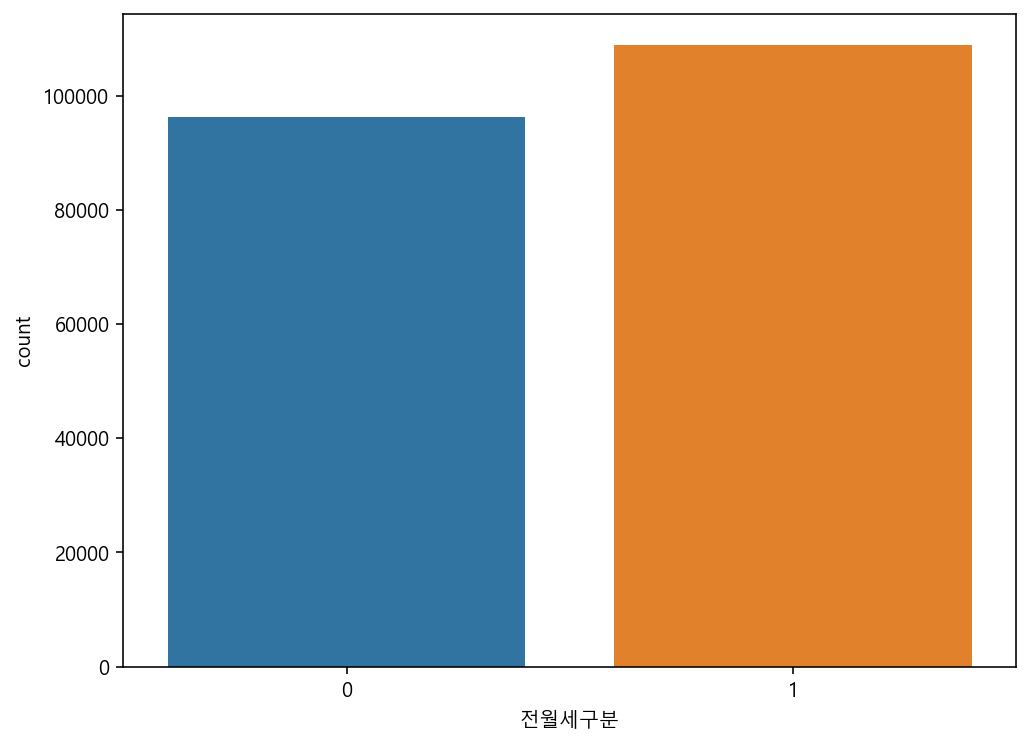

In [191]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['전월세구분'])
plt.show()

gu는 그 지역을 그룹화 한 것으로 지역에 따라 가격차이를 보여줄 수 있으므로,

보증금의 평균순으로 데이터를 labeling 한다.

In [193]:
train_gu = train[['보증금','구']].groupby('구').mean().sort_values('보증금').reset_index()
train_gu.head()

,구,보증금
0,관악구,9.393565
1,강북구,9.421108
2,중랑구,9.465735
3,은평구,9.472929
4,금천구,9.475070


In [195]:
gu_num = {}
for i in range(len(train_gu)):
    gu = train_gu['구'].iloc[i]
    gu_num[gu] = i
    
gu_num

{'관악구': 0,
 '강북구': 1,
 '중랑구': 2,
 '은평구': 3,
 '금천구': 4,
 '노원구': 5,
 '성북구': 6,
 '동대문': 7,
 '강서구': 8,
 '강동구': 9,
 '도봉구': 10,
 '구로구': 11,
 '성동구': 12,
 '동작구': 13,
 '종로구': 14,
 '마포구': 15,
 '광진구': 16,
 '서대문': 17,
 '영등포': 18,
 '중구 ': 19,
 '서초구': 20,
 '송파구': 21,
 '강남구': 22,
 '용산구': 23,
 '양천구': 24}

In [196]:
train = train.replace({'구' : gu_num})
test = test.replace({'구' : gu_num})
train.head()

,계약일자,계약연도,계약월,계약일,구,동,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
0,2016-01-01,2016,1,1,13,노량진동,19.28,16,1,2015,1.65,9.546884
1,2016-01-01,2016,1,1,7,회기동,22.95,6,1,2006,1.65,9.210440
2,2016-01-01,2016,1,1,22,대치동,13.96,2,0,2004,1.65,9.210440
3,2016-01-01,2016,1,1,18,당산동5가,26.22,3,1,2015,1.65,9.615872
4,2016-01-01,2016,1,1,22,역삼동,23.87,12,0,2013,1.65,9.798183


Preprocessing

floor -> Skewness: -0.243296, Kurtosis: -0.409831


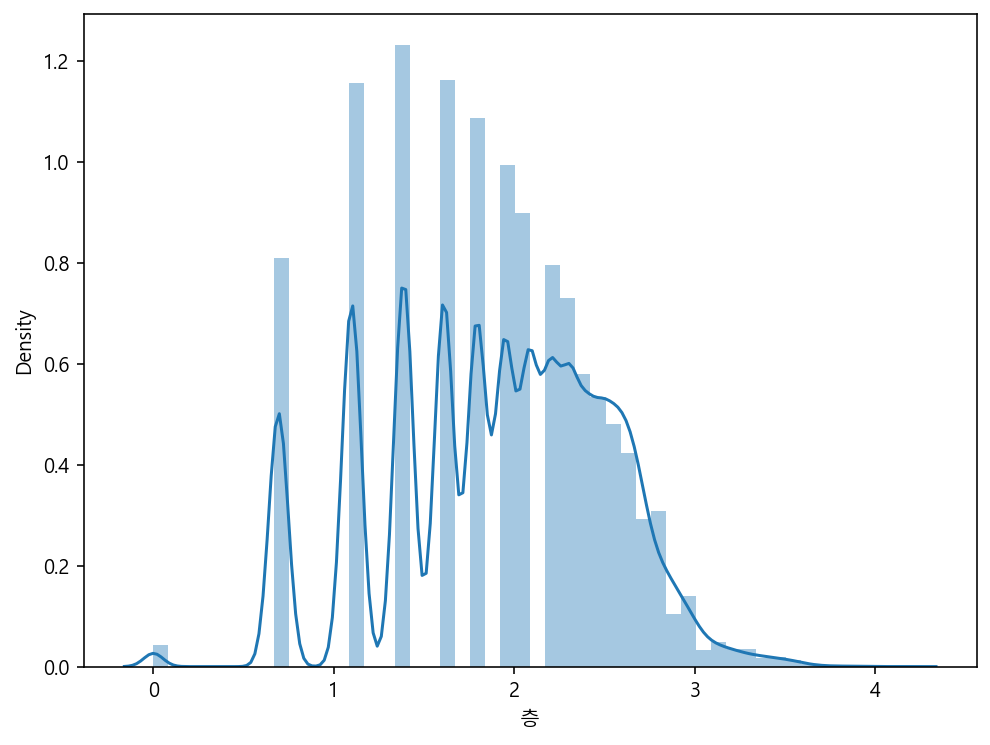

In [197]:
train['층'] = np.log(train['층'])
test['층'] = np.log(test['층'])
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['층'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('floor',train['층'].skew(), 
                                                     train['층'].kurt()))

In [198]:
drop_columns = ['동', '계약일자']

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

train

,계약연도,계약월,계약일,구,전용면적(㎡),층,전월세구분,건축년도,신규취급액기준 COFIX,보증금
0,2016,1,1,13,19.28,2.772589,1,2015,1.65,9.546884
1,2016,1,1,7,22.95,1.791759,1,2006,1.65,9.210440
2,2016,1,1,22,13.96,0.693147,0,2004,1.65,9.210440
3,2016,1,1,18,26.22,1.098612,1,2015,1.65,9.615872
4,2016,1,1,22,23.87,2.484907,0,2013,1.65,9.798183
...,...,...,...,...,...,...,...,...,...,...
205179,2020,12,31,4,17.35,1.098612,0,2018,0.90,9.472782
205180,2020,12,31,7,17.30,1.609438,0,2019,0.90,9.546884
205181,2020,12,31,8,28.41,1.791759,0,2019,0.90,10.077483
205182,2020,12,31,20,15.76,2.397895,1,2005,0.90,9.584934


Feature Engineering

In [199]:
train_test_data = [train, test]

for dataset in train_test_data:
    # 거래하는 기간까지의 오피스텔 나이를 feature 생성
    dataset['노후화'] = dataset['계약연도'] - dataset['건축년도']
    # 샘플코드에 있는 재건추 유무를 판단하는 feature 생성
    dataset['재건축']=(dataset['노후화']>=30).astype(int)

In [200]:
train_columns = []
for column in train.columns[:]:
    if train[column].skew() >= 1:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))
        train_columns.append(column)
    elif train[column].kurt() >= 3:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))
        train_columns.append(column)

전용면적(㎡) -> Skewness: 3.115353, Kurtosis: 15.827509
재건축 -> Skewness: 20.453139, Kurtosis: 416.334936


In [201]:
#정규분포모형을 가질 수 있도록 첨도와 왜도를 조정
#조정하는 방법에는 square root, quarter root, log 등이 있다.
#log에서 0의 값이 들어왔을 때 무한으로 가는 것을 방지하도록 1 더해주는 log1p를 사용

for column in train_columns :
    train[column] = np.log1p(train[column])
    test[column] = np.log1p(test[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))

전용면적(㎡) -> Skewness: 1.274313, Kurtosis: 1.793488
재건축 -> Skewness: 20.453139, Kurtosis: 416.334936


<AxesSubplot:>

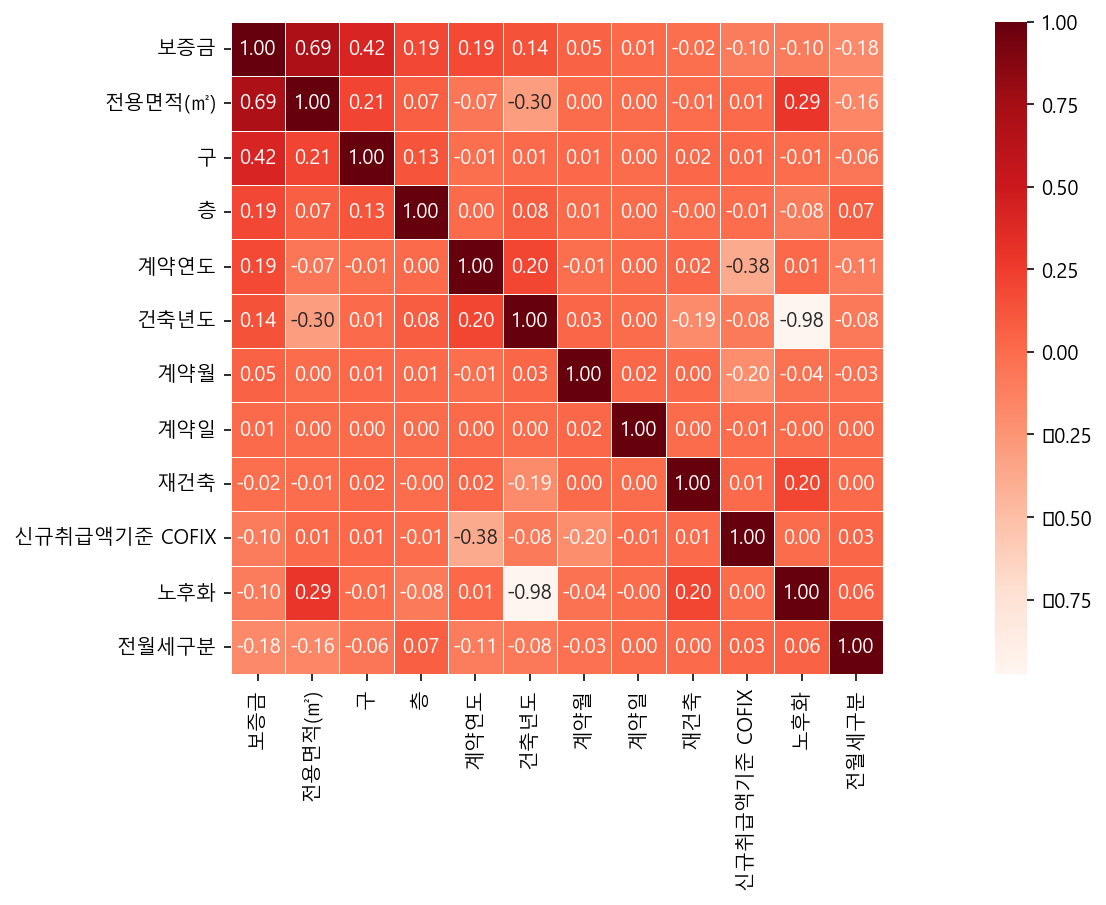

In [202]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, '보증금')['보증금'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

모델링

In [203]:
X_train = train.drop('보증금',axis=1, inplace=False)
y_train = train['보증금']
X_test = test.drop('보증금',axis=1, inplace=False)
y_test = test['보증금']

In [204]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses
   
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 21887.157
Ridge 로그 변환된 RMSE: 21887.157
Lasso 로그 변환된 RMSE: 21887.374


[21887.15681014264, 21887.156843154127, 21887.373581951615]

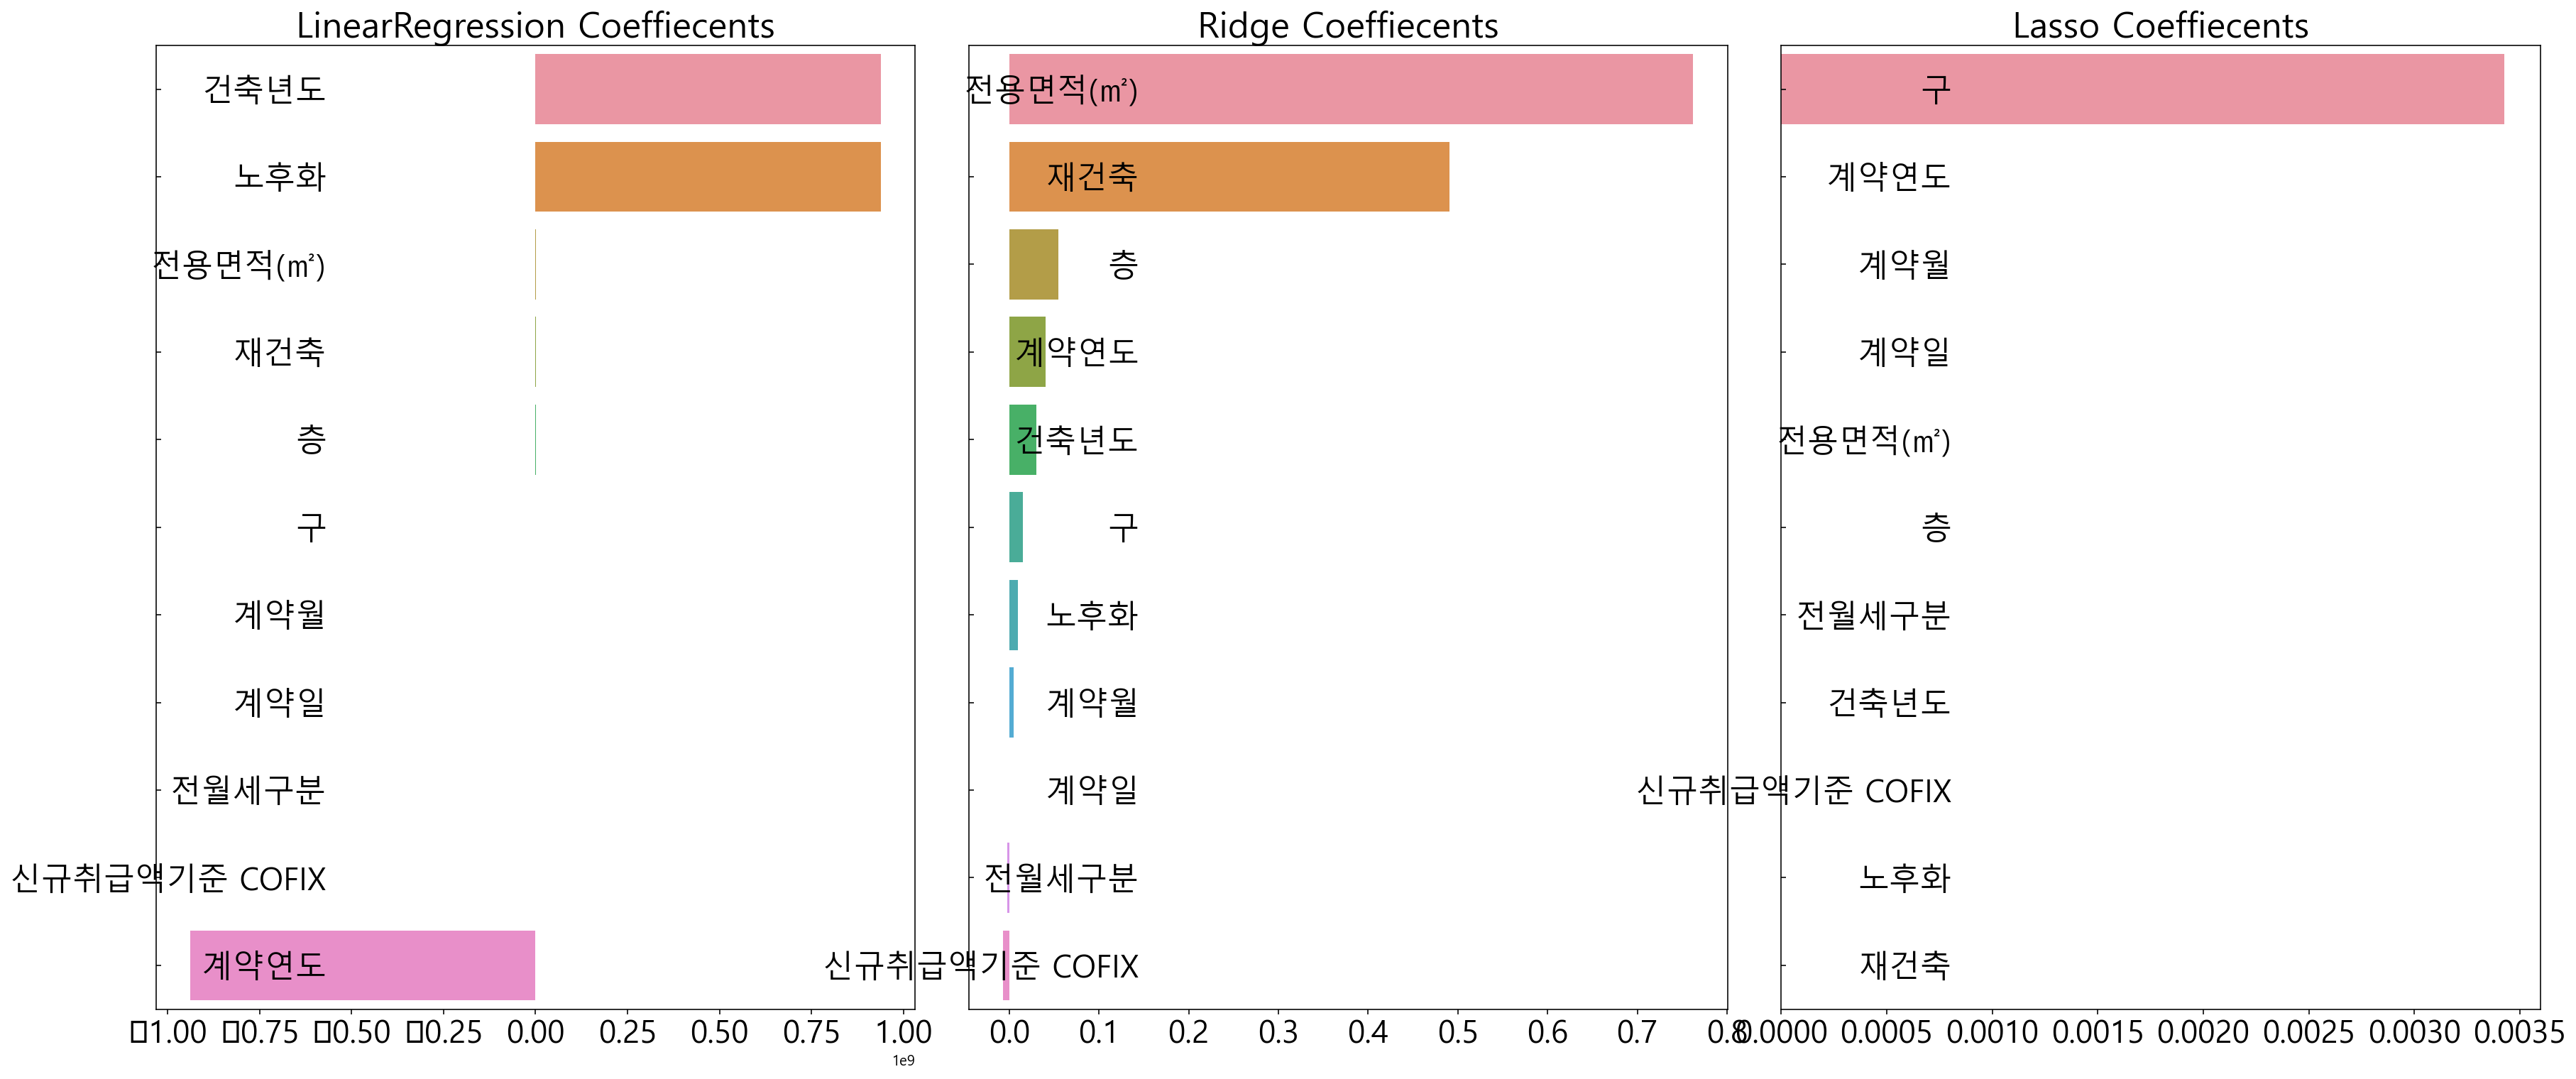

In [206]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_train.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [208]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_train, y_train,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.22  0.224 0.219 0.215 0.22 ]
LinearRegression CV 평균 RMSE 값: 0.22

Ridge CV RMSE 값 리스트: [0.22  0.224 0.219 0.215 0.22 ]
Ridge CV 평균 RMSE 값: 0.22

Lasso CV RMSE 값 리스트: [0.447 0.399 0.385 0.378 0.405]
Lasso CV 평균 RMSE 값: 0.403


In [209]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2196, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2199, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 21887.157
Ridge 로그 변환된 RMSE: 21887.157
Lasso 로그 변환된 RMSE: 21887.16


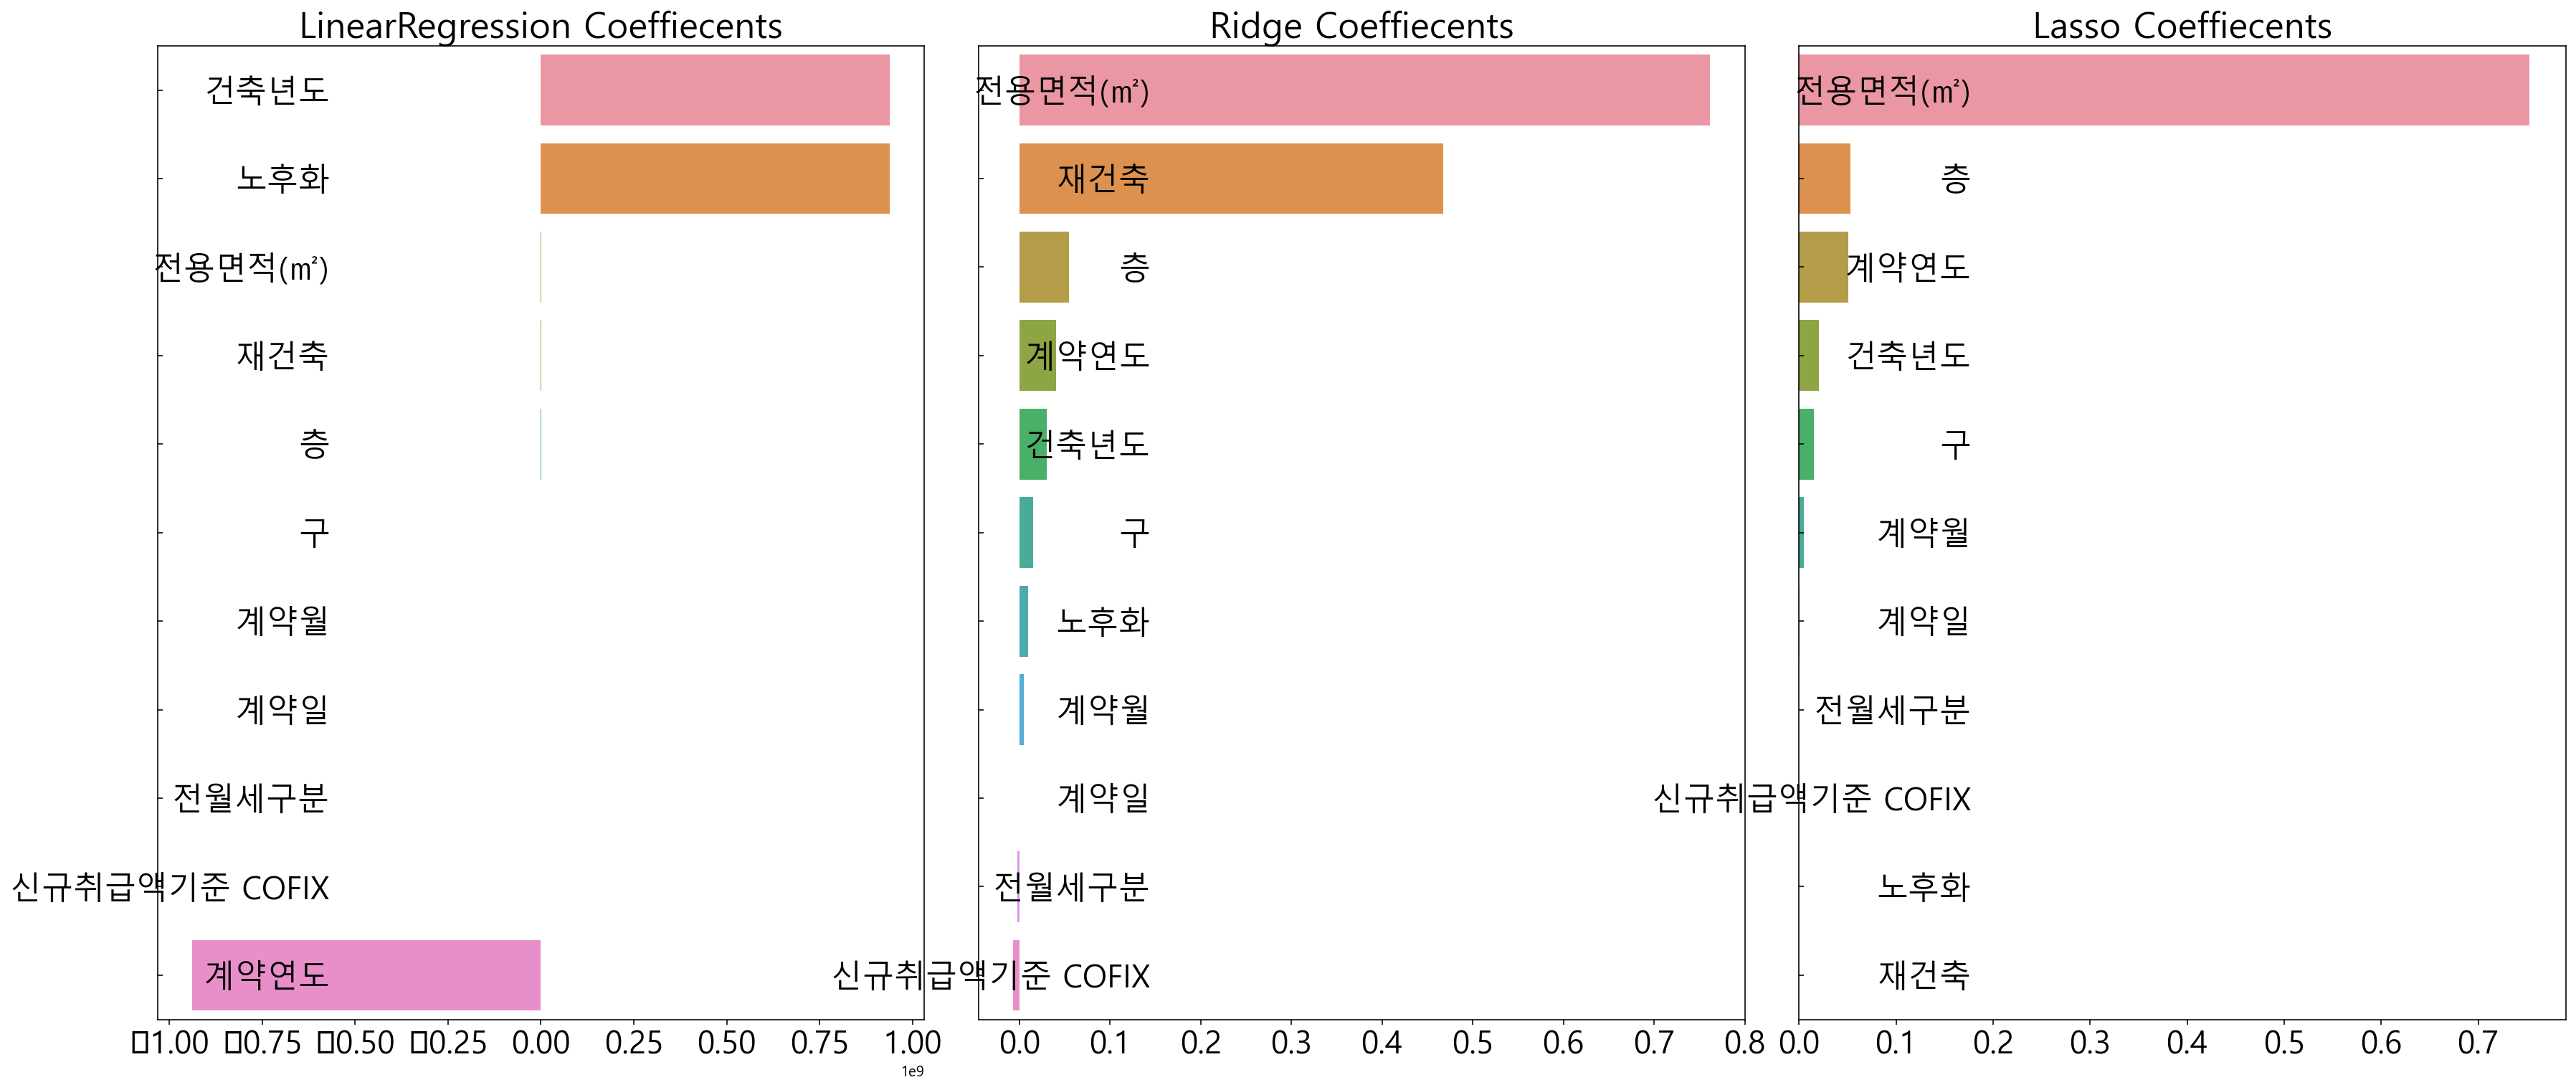

In [210]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [222]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.154, 최적 alpha:{'n_estimators': 1000}


In [223]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1841, 최적 alpha:{'n_estimators': 1000}


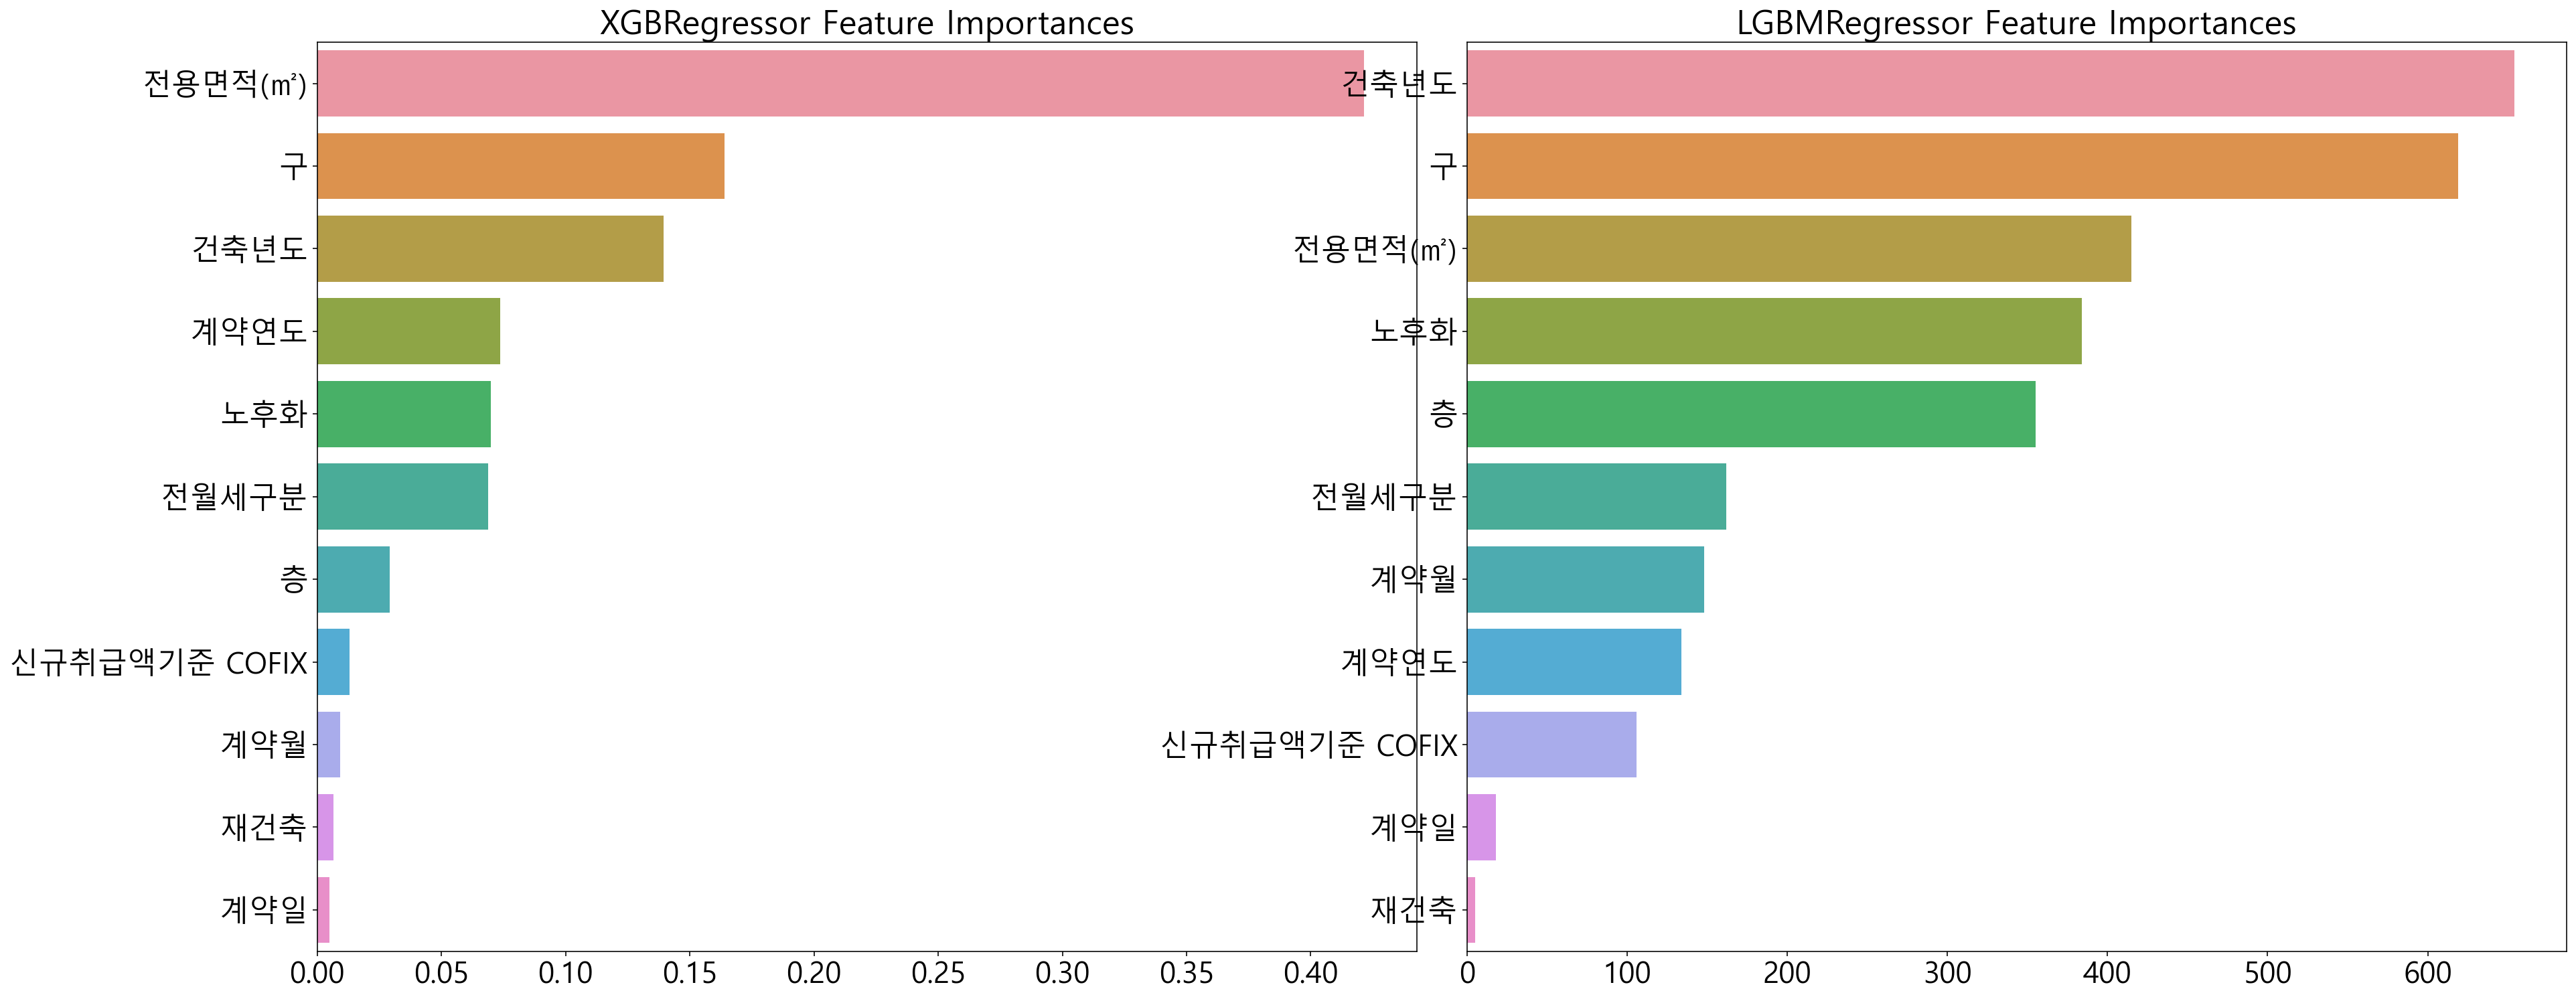

In [224]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [225]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.22437641916168014
Ridge 모델의 RMSE: 0.22313197707183732
Lasso 모델의 RMSE: 0.22566373325106556


In [226]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
  
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.15960558829173596
XGBM 모델의 RMSE: 0.14829691872655335
LGBM 모델의 RMSE: 0.17963131258285106
